<a href="https://colab.research.google.com/github/Devrajsinh-Gohil/ML/blob/main/CompetitivenessPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [ ]:
df.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

In [ ]:
list(df.columns)

['EducationSector',
 'IndividualProject',
 'Age',
 'Gender',
 'City',
 'Influenced',
 'Perseverance',
 'DesireToTakeInitiative',
 'Competitiveness',
 'SelfReliance',
 'StrongNeedToAchieve',
 'SelfConfidence',
 'GoodPhysicalHealth',
 'MentalDisorder',
 'KeyTraits',
 'ReasonsForLack',
 'y']

In [ ]:
# df.dropna()
new_df=df.fillna(method='bfill')
new_df

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,Just not interested! (Want to work in the corp...,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,Just not interested! (Want to work in the corp...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Engineering Sciences,Yes,19,Male,Yes,Yes,4,5,4,3,4,4,5,Yes,Positivity,Just not interested! (Want to work in the corp...,1
215,Engineering Sciences,Yes,19,Male,Yes,No,2,2,2,2,2,2,2,No,Work Ethic,Just not interested! (Want to work in the corp...,0
216,Engineering Sciences,Yes,22,Female,Yes,Yes,3,4,4,3,4,4,3,No,Vision,Lack of Knowledge,1
217,Engineering Sciences,No,19,Male,Yes,No,1,2,2,3,3,2,2,No,Passion,Lack of Knowledge,0


Finding Correltaion between attributes

#Encoding Boolean and Categorical variables

In [ ]:
df.dtypes

EducationSector           object
IndividualProject         object
Age                        int64
Gender                    object
City                      object
Influenced                object
Perseverance               int64
DesireToTakeInitiative     int64
Competitiveness            int64
SelfReliance               int64
StrongNeedToAchieve        int64
SelfConfidence             int64
GoodPhysicalHealth         int64
MentalDisorder            object
KeyTraits                 object
ReasonsForLack            object
y                          int64
dtype: object

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,EducationSector,IndividualProject,Gender,City,Influenced,MentalDisorder,KeyTraits,ReasonsForLack
0,Engineering Sciences,No,Male,Yes,No,Yes,Passion,NaN
1,Engineering Sciences,Yes,Male,No,Yes,Yes,Vision,Just not interested! (Want to work in the corp...
2,Engineering Sciences,No,Male,Yes,No,No,Passion,Not willing to start a venture in India and wa...
3,Engineering Sciences,Yes,Male,Yes,Yes,No,Resilience,Not able to take a Financial Risk
4,Engineering Sciences,Yes,Male,Yes,Yes,Yes,Vision,NaN


In [ ]:
obj_df["EducationSector"].value_counts()

Engineering Sciences                                     123
Economic Sciences, Business Studies, Commerce and Law     32
Art, Music or Design                                      21
Others                                                    20
Medicine, Health Sciences                                 10
Humanities and Social Sciences                             5
Mathematics or Natural Sciences                            4
Teaching Degree (e.g., B.Ed)                               3
Language and Cultural Studies                              1
Name: EducationSector, dtype: int64

In [ ]:
obj_df["KeyTraits"].value_counts()

Positivity    73
Passion       62
Work Ethic    39
Vision        35
Resilience    10
Name: KeyTraits, dtype: int64

{"EducationSector":     {"Engineering Sciences": 1, "Economic Sciences, Business Studies, Commerce and Law": 2,
                                         "Art, Music or Design":3,"Others":4,"Medicine, Health Sciences":5,"Humanities and Social Sciences":6,
                                         "Mathematics or Natural Sciences":7,"Teaching Degree (e.g., B.Ed)":8,"Language and Cultural Studies":9},
                 "IndividualProject":   {"No":0,"Yes":1},
                 "Gender":    {"Male":1,"Female":0},
                 "City":    {"No":0,"Yes":1},
                 "Influenced":    {"No":0,"Yes":1},
                 "MentalDisorder":    {"No":0,"Yes":1}}

In [ ]:
converstion_map = {"EducationSector":     {"Engineering Sciences": 1, "Economic Sciences, Business Studies, Commerce and Law": 2,
                                         "Art, Music or Design":3,"Others":4,"Medicine, Health Sciences":5,"Humanities and Social Sciences":6,
                                         "Mathematics or Natural Sciences":7,"Teaching Degree (e.g., B.Ed)":8,"Language and Cultural Studies":9},
                 "IndividualProject":     {"No":0,"Yes":1},
                 "Gender":                {"Male":1,"Female":0},
                 "City":                  {"No":0,"Yes":1},
                 "Influenced":            {"No":0,"Yes":1},
                 "MentalDisorder":        {"No":0,"Yes":1},
                 "KeyTraits":             {"Positivity":1,"Passion":2,"Work Ethic":3,"Vision":4,"Resilience":5}}

In [ ]:
new_df = new_df.replace(converstion_map)
new_df.head(10)

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,1,0,19,1,1,0,2,2,3,3,2,2,3,1,2,Just not interested! (Want to work in the corp...,1
1,1,1,22,1,0,1,3,3,3,4,4,3,4,1,4,Just not interested! (Want to work in the corp...,0
2,1,0,18,1,1,0,3,4,3,3,3,4,4,0,2,Not willing to start a venture in India and wa...,0
3,1,1,20,1,1,1,3,3,3,3,4,3,3,0,5,Not able to take a Financial Risk,0
4,1,1,19,1,1,1,2,3,3,3,4,3,2,1,4,Just not interested! (Want to work in the corp...,1
5,1,0,19,1,1,1,3,3,3,3,3,3,3,0,1,Just not interested! (Want to work in the corp...,1
6,1,1,19,1,1,1,3,2,3,3,4,1,1,0,3,Just not interested! (Want to work in the corp...,1
7,1,0,20,1,1,1,4,2,4,4,5,3,4,1,3,Just not interested! (Want to work in the corp...,0
8,4,1,20,1,1,1,2,3,3,1,2,2,2,0,2,"Academic Pressure, Lack of Knowledge, Not able...",0
9,1,1,17,1,1,1,2,3,2,1,4,3,3,1,3,Not willing to start a venture in India and wa...,1


In [ ]:
new_df.corr()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
EducationSector,1.000000,-0.030496,-0.047233,-0.135788,0.024566,0.078236,-0.017678,-0.086690,-0.125787,-0.125968,-0.156241,-0.040410,-0.049730,-0.009609,0.083422,-0.014632
IndividualProject,-0.030496,1.000000,0.226065,-0.015245,0.084114,0.031627,0.031565,0.112145,0.165920,0.039781,-0.060259,0.054888,0.002989,0.096484,0.103549,0.121054
Age,-0.047233,0.226065,1.000000,-0.073222,-0.161573,-0.000325,-0.021489,-0.060069,0.044206,0.036990,-0.034524,-0.002958,0.004295,0.060705,-0.019679,-0.018444
Gender,-0.135788,-0.015245,-0.073222,1.000000,-0.066542,0.142148,-0.041491,-0.050707,-0.003987,-0.018578,0.048881,-0.001913,0.161284,-0.030718,0.113078,0.077813
City,0.024566,0.084114,-0.161573,-0.066542,1.000000,-0.028237,0.082605,0.100250,0.068982,-0.000321,-0.015542,0.040927,-0.019986,0.041192,-0.103119,0.073973
Influenced,0.078236,0.031627,-0.000325,0.142148,-0.028237,1.000000,0.035365,0.096394,0.045323,0.029158,0.143992,0.092021,0.039530,0.018511,0.095610,0.255204
Perseverance,-0.017678,0.031565,-0.021489,-0.041491,0.082605,0.035365,1.000000,0.644626,0.712176,0.662511,0.630872,0.591310,0.489082,0.025256,-0.065240,0.028037
DesireToTakeInitiative,-0.086690,0.112145,-0.060069,-0.050707,0.100250,0.096394,0.644626,1.000000,0.709056,0.619094,0.596888,0.638758,0.505063,0.045892,-0.111287,0.092578
Competitiveness,-0.125787,0.165920,0.044206,-0.003987,0.068982,0.045323,0.712176,0.709056,1.000000,0.669914,0.584374,0.600111,0.538735,0.048025,-0.013170,0.028401
SelfReliance,-0.125968,0.039781,0.036990,-0.018578,-0.000321,0.029158,0.662511,0.619094,0.669914,1.000000,0.691219,0.614498,0.535205,0.065200,-0.098912,0.082386


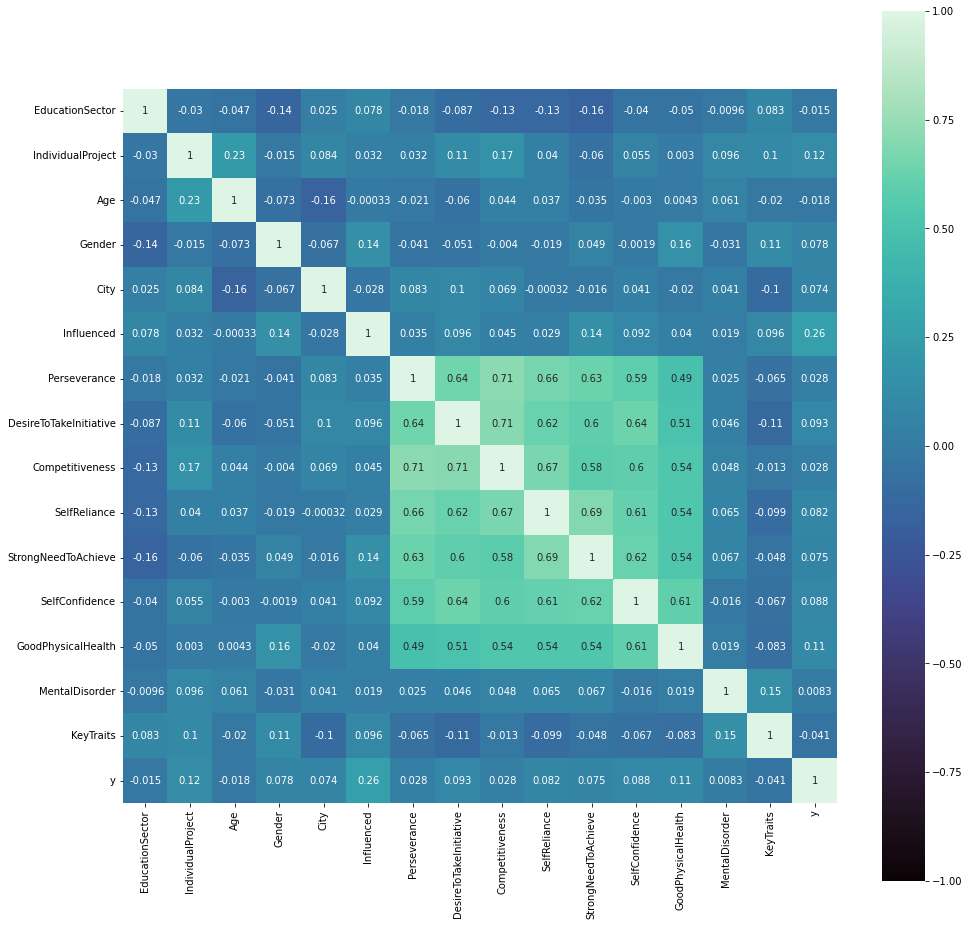

In [ ]:
plt.figure(figsize = (16,16))
sns.heatmap(new_df.corr(),vmin=-1,vmax=1, annot=True, cmap=(sns.color_palette("mako", as_cmap=True)),square=True)

In [ ]:
drop_col=new_df.copy()
drop_col.drop(drop_col.columns[[0,1,2,3,4,5,13,14,15,16]], axis=1, inplace=True)
drop_col

,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth
0,2,2,3,3,2,2,3
1,3,3,3,4,4,3,4
2,3,4,3,3,3,4,4
3,3,3,3,3,4,3,3
4,2,3,3,3,4,3,2
...,...,...,...,...,...,...,...
214,4,5,4,3,4,4,5
215,2,2,2,2,2,2,2
216,3,4,4,3,4,4,3
217,1,2,2,3,3,2,2


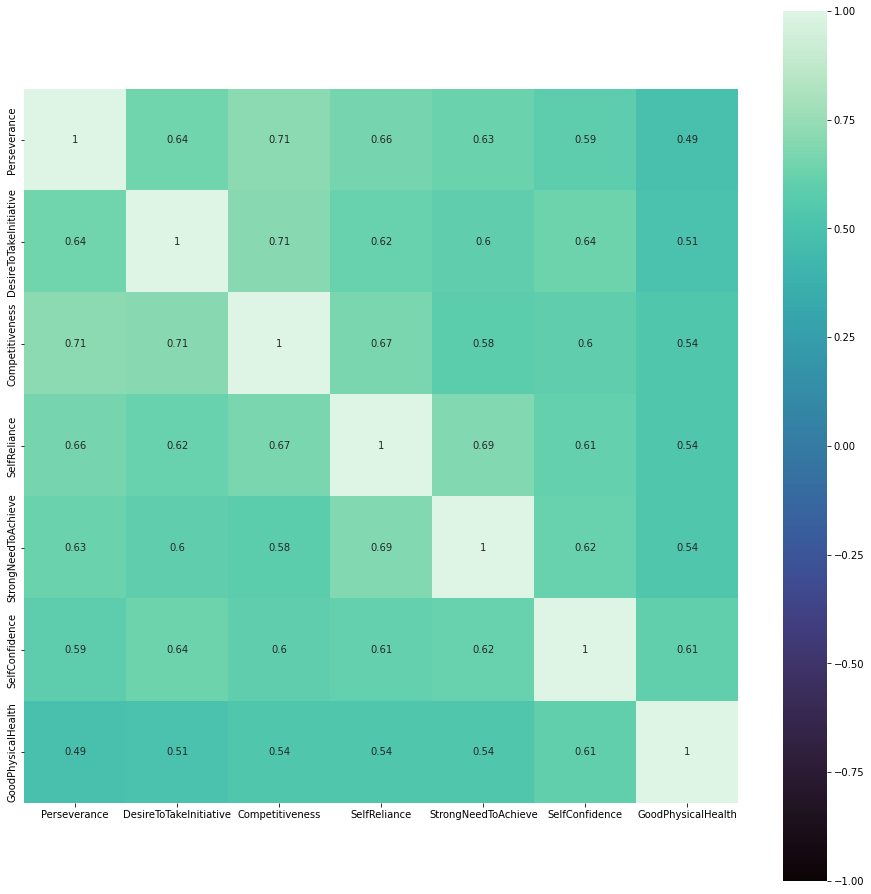

In [ ]:
plt.figure(figsize = (16,16))
sns.heatmap(drop_col.corr(),vmin=-1,vmax=1, annot=True, cmap=(sns.color_palette("mako", as_cmap=True)),square=True)

In [ ]:
y = drop_col.Competitiveness
skills = ['Perseverance', 'DesireToTakeInitiative', 'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence', 'GoodPhysicalHealth']
X = drop_col[skills]
X.describe()

,Perseverance,DesireToTakeInitiative,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,3.351598,3.621005,3.721461,3.908676,3.575342,3.561644
std,0.995234,1.152467,1.053629,1.023068,1.120098,1.100287
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
X.head()

,Perseverance,DesireToTakeInitiative,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth
0,2,2,3,2,2,3
1,3,3,4,4,3,4
2,3,4,3,3,4,4
3,3,3,3,4,3,3
4,2,3,3,4,3,2


In [ ]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: Competitiveness, dtype: int64

In [ ]:
my_model = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=-1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# my_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, n_jobs=4)
# my_model.fit(train_X, train_y, 
#              early_stopping_rounds=10, 
#              eval_set=[(val_X, val_y)], 
#              verbose=False)

my_model.fit(train_X, train_y)

RandomForestRegressor(criterion='absolute_error', random_state=1)

In [ ]:
val_predictions = my_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))
# print(val_predictions)

0.5625454545454546
